In [98]:
from matplotlib import pyplot
import seaborn as sns
import pandas as pd
import numpy as np
import os
import random
%matplotlib inline

In [70]:

ans_list = []
b_list = []
t_list = []
with open('./challenge/answer/ans.txt', 'r') as file:
    for lang in file:
        ans_list.append(lang.strip())
        


sz = len(ans_list)
lang_list = np.unique(np.array(ans_list))

# Mock data
b_list= ans_list.copy()
t_list = ans_list.copy()
for _ in range(random.randint(150,250)):
    i1 = random.randint(0, sz - 1)
    i2 = random.randint(0, sz - 1)
    b_list[i1], b_list[i2] = b_list[i2] , b_list[i1]
    
for _ in range(random.randint(150,250)):    
    i1 = random.randint(0, sz - 1)
    i2 = random.randint(0, sz - 1)
    t_list[i1], t_list[i2] = t_list[i2] , t_list[i1]
        
# Get data from files
'''
with file as open("./challenge/answer/b.txt"):
    for lang in file:
        b_list.append(lang.strip())        
        
with file as open("./challenge/answer/t.txt"):
    for lang in file:
        t_list.append(lang.strip())
'''

df = pd.DataFrame({'Answer' : ans_list, 'B' : b_list, 'T' : t_list})
df['B OK'] = df['B'] == df['Answer']
df['T OK'] = df['T'] == df['Answer']
df

,Answer,B,T,B OK,T OK
0,Tcl,Tcl,Tcl,True,True
1,Ruby,Ruby,Java,True,False
2,Perl-6,Nim,Perl-6,False,True
3,Kotlin,Kotlin,Kotlin,True,True
4,REXX,REXX,Java,True,False
5,Go,Perl-6,Go,False,True
6,Ruby,Ruby,Ruby,True,True
7,OCaml,OCaml,OCaml,True,True
8,Ada,Ada,Ada,True,True
9,Ruby,Ruby,Ruby,True,True


In [81]:
# Build results dataframe
total_cnt = []
b_cnt = []
t_cnt = []
for lang in lang_list:
    total_cnt.append((df['Answer'] == lang).sum())
    b_cnt.append((df[df['Answer'] == lang])['B OK'].sum())
    t_cnt.append((df[df['Answer'] == lang])['T OK'].sum())


results_df = pd.DataFrame({'Language Name':lang_list, 'Count': total_cnt, 'B Count':b_cnt , 'T Count':t_cnt})
results_df = results_df[['Language Name', 'Count', 'B Count', 'T Count']]
#results_df.append(pd.DataFrame({'Total', results_df['Count'].sum(), results_df['B Count'].sum(), results_df['T Count'].sum()))
results_df.loc[30] = ['Total', results_df['Count'].sum(), results_df['B Count'].sum(), results_df['T Count'].sum()]
results_df['B Accuracy'] = results_df['B Count']/results_df['Count']
results_df['T Accuracy'] = results_df['T Count']/results_df['Count']
results_df

,Language Name,Count,B Count,T Count,B Accuracy,T Accuracy
0,Ada,106,98,94,0.924528,0.886792
1,AutoHotkey,104,86,98,0.826923,0.942308
2,BBC-BASIC,88,78,79,0.886364,0.897727
3,C,142,128,125,0.901408,0.880282
4,C++,94,84,82,0.893617,0.872340
5,Clojure,90,84,78,0.933333,0.866667
6,Common-Lisp,109,101,98,0.926606,0.899083
7,D,107,92,98,0.859813,0.915888
8,Go,137,117,120,0.854015,0.875912
9,Haskell,123,112,107,0.910569,0.869919


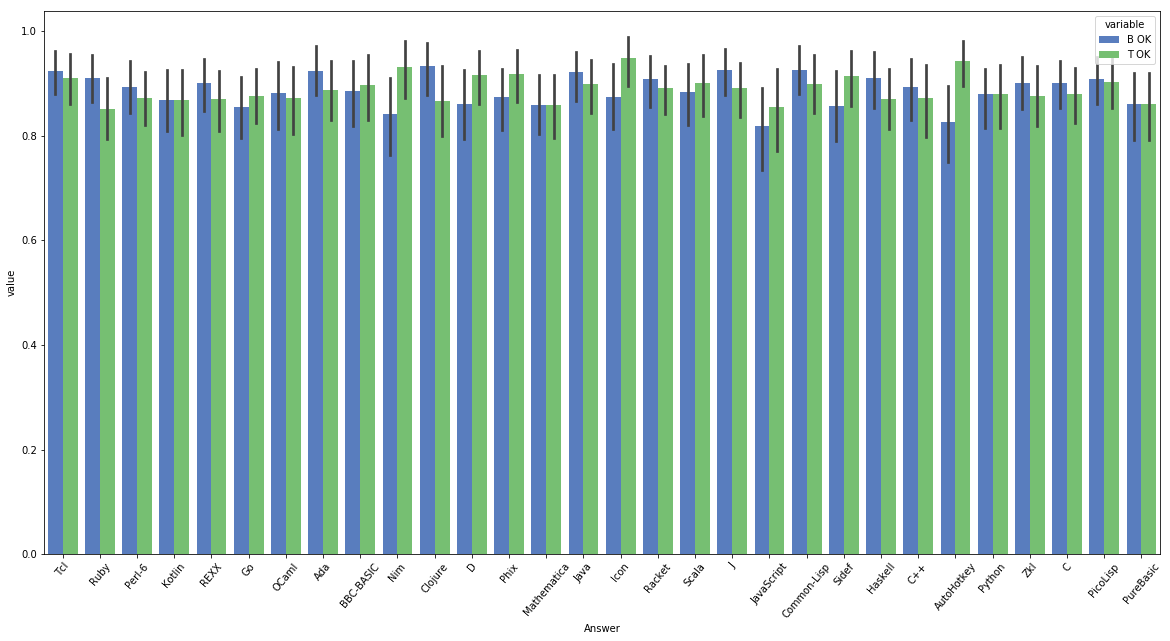

In [136]:
melted_df = df.melt(id_vars=['Answer'], value_vars=['B OK', 'T OK'])
dims = (20, 10)
fig, ax = pyplot.subplots(figsize=dims)
plot = sns.barplot(ax=ax, x='Answer', y='value', data=melted_df, hue='variable', palette='muted')
plot.set_xticklabels(plot.get_xticklabels(), rotation=50)
plot

In [135]:
both_right = ((df['B OK'] == True) & (df['T OK'] == True)).sum()
b_right = ((df['B OK'] == True) & (df['T OK'] == False)).sum()
t_right = ((df['B OK'] == False) & (df['T OK'] == True)).sum()
both_wrong = ((df['B OK'] == False) & (df['T OK'] == False)).sum()

print(both_right, b_right)
print(t_right, both_wrong)

2838 349
346 51
